# Linear Regression by scratch approach, sklearn library and Artificial Neural Network using Keras.

In this notebook, we will briefly discuss  about linear regression and later we will implement this algorithim from scratch, and using scikit learn python library. We will also build an artificial neural network using keras. The main objective of this notebook is to learn how to implement the linear regression algorithm, we are not very concerned about its performance. Before we dive into the implementation, let us first understand the algorithm. The discussion will cover the following:

- What is linear regression?
- When to use linear regression?
- How does linear regression work?


**1.  What is linear regression?**

Linear regression is a supervised learning algorithm (It learns labelled structured data). 

It examines the linear relationship between a target (also known as a response or dependent variable) 
and feature(s) (also known as predictor(s) or independent variable(s)). 

To understand what a target and a feature is, let us look at the scenario in which we need to examine if body mass index of an adult person is associated with or related to weight and height. In this case, the body mass index is the target, while weight and height are the features. The body mass index depends on the weight and height.  

There are two types of linear regression:

- Univariate linear regression -  only one feature is used with a target.

- Multivariate regression - two or more features are used with a target.


**2. When to use linear regression?**

Supervised learning algorthims try to solve two types of problems; regression and classification problem. 

Linear regression, as its name suggests and being a supervised learning algorithm, it analyses regression problems. 

It predicts a continous target, based on features. Features can be continous or discrete. 

- Therefore, inorder to use linear regression, it is important to note that the target must be continous.

- Some of the advantages of this algorthim are; computationally fast and simple to interpret.

- Linear regression assumes that there is a linear relationship between the target and features.

- Linear regression will not perform well if the relationship between the target and the features is not linear i.e the prediction of the target will not be good.


**How does linear regression work?**

In supervised learning, the goal is to fit well a model or an **hypothesis** on a given training dataset, 
so that this model will later be used to give predictions on a new dataset also known test dataset. 

Linear regression model or hypothesis takes the following linear form:

$$h_\theta(x) = \theta_0 + \theta_1x_1 +\theta_2x_2+...+\theta_nx_n$$

where;

- $h_\theta(x)$ is the target
- $\theta's$ are weights or parameters
- $x's$ are features

Now that we have a hypothesis to fit on a training dataset, we need a criterion to evaluates if our hypothesis performs well i.e it can make better predictions of the target. So what is the criterion?

The criterion of a linear regression is the **cost function** (also known as the mean square error or loss function). The cost function gives the difference between the values of the actual (also known as real or observed) target and the values of predicted target.

The cost function is defined as;

$$J(\theta) = \frac{1}{2n}\sum_{i=1}^{n}(h_\theta(x_i)-y_i)^2$$

where;

- $n$ is the number of training samples/examples
- $h_\theta(x_i)$ is the $i'th$ predicted value of the target

- $y_i$ is the $i'th$ actual value of the target.

Now, how do we use this cost function to evaluate our hypothesis? 

Remember we mentioned above that the cost function gives the difference between the actual values of the target and the predicted values of the target. 

We need to ask ourselves what will happen when the difference is big or small? The difference being big, implies that the predicted values are very far from the actual values, of which we don't need this. We need the difference to very small, that is close to zero. 

The measure of the difference of the cost function is determined by its parameters. 

We should note that parameters are unknown and we need compute them. To find the best parameters that give a small difference or minimizes the cost function, we need a learning algorithim. 

The most common used learning algorithm is the **Gradient Descent** which is given by

$$\theta_j := \theta_j - \alpha \Delta_\theta J(\theta)$$

Now, we have all the necessary tools that we need for the implementation of the linear regression. Let's get down to the implementation task using these tools.




In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
#Loading data
data = pd.read_csv("/home/aims/Documents/Kaggle Data/diabetes.csv")
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:

#Input values of features
X = data.drop('BMI',1)
print('shape of X: ',X.shape)

#Output values of features
y = data['BMI'].values.reshape(-1,1)
print('shape of y: ',y.shape)

#splitting data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)


shape of X:  (768, 8)
shape of y:  (768, 1)


# Linear regression from scratch

In [4]:
#Define cost fuction
#X-input values matrix, y-output value vector, parameter vector

def cost_function(X,y,params):
    #number of samples
    no_samples = len(y)
    
    #Error- difference between predicted value of y and actual/observed value of value
    error = (X@params) - y
    
    #formula for obtaining the cost
    return (1/(2*no_samples))*np.sum(error**2)
    
    

In [5]:
#Define gradient descent
def gradient_descent(X, y, params, learning_rate, n_iters):
    no_samples = len(y)
    
    #Track cost in each iteration
    cost_track = np.zeros((n_iters,1))
    
    for i in range(n_iters):
        #updating parameters
        params = params - (learning_rate/no_samples)* X.T @ (X@params-y)
        cost_track[i] = cost_function(X,y,params)
    return (cost_track,params)

In [6]:
#Normalizing our data/ feature scaling 
mu = np.mean(x_train,0)
sigma = np.std(x_train,0)

x_train = (x_train-mu)/sigma

#Introducing bias in our input matrix
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

#Initialising parameters to zeros
params = np.zeros((x_train.shape[1],1))


In [28]:
#Normalising our test set
x_test = (x_test-mu)/sigma

#Introducing bias to test set
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

#predicting the y output
y_pred = x_test@optimal_parameters


In [29]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_pred, y_test))
rms

6.861001413749793

# Linear regression using sklearn

In [19]:
#import Linear regression module
from sklearn.linear_model import LinearRegression

In [22]:
#Calling the linear regression function from sklearn
model = LinearRegression()

#training our model
model.fit(x_train,y_train)

print('The intercept of the model is: ', model.intercept_)

print('The coeffeicient of the model are: ',model.coef_)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
#predicting output value of y
y_pred = model.predict(x_test)


In [124]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_pred, y_test))
rms

6.861001413931367

# Linear regression using ANN by keras

In [3]:
#Input values of features
X = data.drop('BMI',1)
print('shape of X: ',X.shape)

#Output values of features
y = data['BMI'].values.reshape(-1,1)
print('shape of y: ',y.shape)




shape of X:  (768, 8)
shape of y:  (768, 1)


In [4]:
#Performing feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
#Checking the maximum values of the input features
print('Maximum value of each feature',scaler_x.data_max_)
#Checking the minimum values of the input features
print('Minimum value of each feature', scaler_x.data_min_)

#Checking the maximum values of the output
print('Maximum value of output',scaler_y.data_max_)
#Checking the minimum values of the output
print('Minimum value of output', scaler_y.data_min_)


In [16]:
#Checking to ensure that the values of the scaled features and output are between 0 and 1.
print(X_scaled)
print(y_scaled)

**Training the model**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=0)

In [9]:
#tensflow used to build ANN
#We can take keras as a function
import tensorflow.keras

#building model in a sequential form
from keras.models import Sequential

#for fully connceted ANN(dense)
from keras.layers import Dense

model = Sequential()
#Add first layer, 45=no of neurons, 5=inputs
model.add(Dense(40, input_dim=8, activation='relu'))
#adding hidden layer
model.add(Dense(40, activation='relu'))
#adding output layer, 1=output, act=linear becoz we predict continous values
model.add(Dense(1, activation='linear'))
#Generate table showing description of your ANN
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=10, batch_size=50,  verbose=1, validation_split=0.2)




Train on 491 samples, validate on 123 samples
Epoch 1/10
491/491 [==============================] - 0s 214us/step - loss: 0.1813 - val_loss: 0.0639
Epoch 2/10
491/491 [==============================] - 0s 15us/step - loss: 0.0355 - val_loss: 0.0220
Epoch 3/10
491/491 [==============================] - 0s 26us/step - loss: 0.0228 - val_loss: 0.0253
Epoch 4/10
491/491 [==============================] - 0s 24us/step - loss: 0.0187 - val_loss: 0.0172
Epoch 5/10
491/491 [==============================] - 0s 19us/step - loss: 0.0152 - val_loss: 0.0161
Epoch 6/10
491/491 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0145
Epoch 7/10
491/491 [==============================] - 0s 20us/step - loss: 0.0130 - val_loss: 0.0139
Epoch 8/10
491/491 [==============================] - 0s 18us/step - loss: 0.0124 - val_loss: 0.0132
Epoch 9/10
491/491 [==============================] - 0s 37us/step - loss: 0.0117 - val_loss: 0.0126
Epoch 10/10
491/491 [======================

**Evaluating the model**

dict_keys(['val_loss', 'loss'])


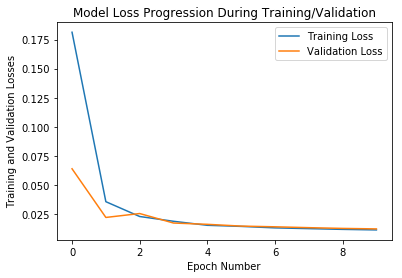

In [12]:
print(epochs_hist.history.keys())
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])




**Prediction**

In [15]:

y_predict_sample = model.predict(X_test)

print('Expected measure of BMI=', y_predict_sample)
y_predict_sample_original = scaler_y.inverse_transform(y_predict_sample)
print('Expected measure of BMI=', y_predict_sample_original)


In [14]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_predict_sample, y_test))
rms

0.10627072087221504

**Linear Regression from scratch using a Class**

In [85]:
class LinearRegression:
    def __init__(self,learning_rate=0.01, num_iteration=500):
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
    
    def cost_fun(self, X, param,y):
        m = len(y)
        error = X@param
        return (1/(2*m))*np.sum((X@param-y)**2)
    
    def gradient_descent(self, X, y, param):
        #m = len(y)
        grad = (1/len(X))* X.T @ (X@param-y)
        #print(grad.shape)
        return grad
    
    def fit(self,X,y):
        X_copy = X.copy()
        mu = np.mean(X_copy,0)
        sigma = np.std(X_copy,0)

        X_copy = (X_copy-mu)/sigma

        X_copy = np.hstack((np.ones((X_copy.shape[0],1)),X_copy))
        #print(X_copy.shape)
        self.param = np.zeros((X_copy.shape[1],1))
        for i in range(self.num_iteration):
            #cost = self.cost_fun(X_copy,self.param,y)
            grad = self.gradient_descent(X_copy,y, self.param).reshape(-1, 1)
            #print(grad.shape)
            self.param = self.param-self.learning_rate*grad
    def predict(self,X) :
        X_test = X.copy()
        mu = np.mean(X_test,0)
        sigma = np.std(X_test,0)

        X_test = (X_test-mu)/sigma

        #print(X_test.shape)
        X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        #print(X_test.shape)
        return (X_test@self.param)

In [86]:
lr = LinearRegression(learning_rate=0.01, num_iteration=5000)

In [87]:
lr.fit(x_train,y_train)

In [90]:
#calling prediction function
pred  = lr.predict(x_test)



In [89]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(pred, y_test))
rms

6.890352096087308